# Network Analysis Using Bookworm

Author: Jack Humble  
Date: 14/02/2019  
Module: Network Data Analysis 7CUSMNDA  
Coursework 1

### Contents
1. Data creation and cleaning
2. Visualising networks using networkx
3. Creating json files for D3 visualisations
4. Network Info
5. Time and Chronological Networks
6. Pagerank
7. Novel Similarity

## Data creation and cleaning

In [1]:
# Import relevant libraries
from bookworm import *
from corrected_bookworm_functions import *

import pandas as pd
import networkx as nx
import spacy
import nltk
import string
import os
import matplotlib.pyplot as plt
import json
import random

import warnings
warnings.simplefilter('ignore') 

The five books being analysed are:  
- **Alice's Adventures in Wonderland** by Lewis Carroll (1865) http://www.gutenberg.org/ebooks/11
- **Pride and Prejudice** by Jane Austen (1813) http://www.gutenberg.org/ebooks/1342
- **Les Misérables** by Victor Hugo (1862) http://www.gutenberg.org/ebooks/135  
- **Crime and Punishment** by Fyodor Dostoyevsky (1866) http://www.gutenberg.org/ebooks/2554
- **Great Expectations** by Charles Dickens (1861) http://www.gutenberg.org/ebooks/1400


The raw text files for each book were downloaded and stored in the data/raw directory.

In [2]:
# Store book titles as variables

aiw = "aliceinwonderland"
pap = "prideandprejudice"
lesmis = "lesmiserables"
cap = "crimeandpunishment"
ge = "greatexpectations"

### Read in and create interaction dataframes

We start by storing all five interaction dataframes as variables. This is done using the Bookworm function which
creates an interaction dataframe from a raw .txt file. The function has been updated to allow
for the removal of words which are known to have been incorrectly implemented or included.

NB: The bookworm function, for some reason unbeknownced to me, will not produce the *exact* identical network 
every time it is run. Possible due to some inner workings of the spacy library. 
However, the networks are similar enough for an analysis like this.

In [3]:
# Alice in Wonderland
aiw_int_df = bookworm_sanitized(os.path.join("data", "raw", aiw + ".txt"), 
                                threshold=2,
                                exclude_words = ['Owl', 'Panther'])

In [14]:
# Pride and Prejudice
pap_int_df = bookworm_sanitized(os.path.join("data", "raw", pap + ".txt"), 
                                threshold=1,
                                exclude_words = ['Miss'])

In [29]:
# Les Miserables (This book requires several minutes to process and requires some cleaning)
lesmis_int_df = bookworm_sanitized(os.path.join("data", "raw", lesmis + ".txt"), 
                                threshold=2, exclude_words = ['Rue', 'Master', 'Aix',
                                                              'Sister', 'Oratory', 'Man',
                                                              'War', 'Mistress', 'Sainte', 
                                                              'Holy', 'Jardin', 'Faubourg', 
                                                              'Perpetual', 'Grand', 'Quai', 
                                                              'Azelma', 'Gavroche', 'Brujon',
                                                              'Rights', 'Ages', 'Empire', 
                                                              'July', 'New'])

In [26]:
# Crime and Punishment
cap_int_df = bookworm_sanitized(os.path.join("data", "raw", cap + ".txt"), 
                                threshold=1, 
                                exclude_words = ['Neva', 'Mary', 'Newton', 
                                                 'Pavlovna', 'Hay', 'Explosive',
                                                 'Afanasy'])

In [24]:
# Great Expectations
ge_int_df = bookworm_sanitized(os.path.join("data", "raw", ge + ".txt"), 
                               threshold=1, 
                               exclude_words = ['Street', 'House', 'Blue', 
                                                'Miss', 'Arthur', 'Day',
                                                'South', 'Identity', 'Him', 'Too'])

## Visualising Networks using Networkx

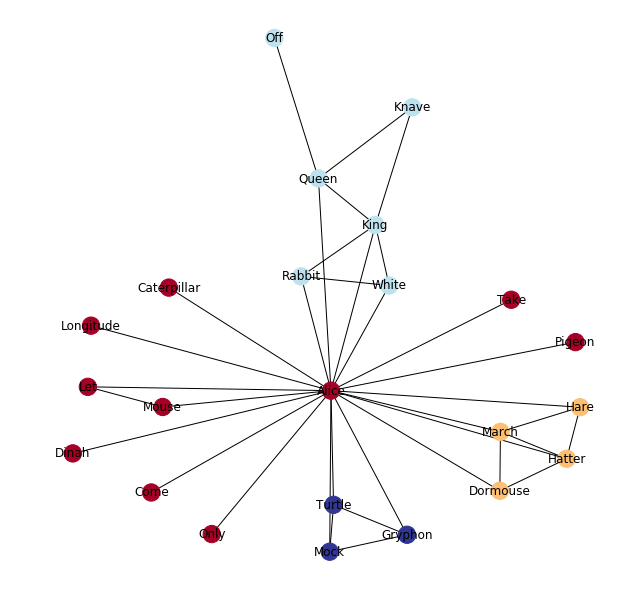

In [13]:
'''
The following code plots a networkx graph of each of the books and saves them
in a png file. The code also splits the network into different groups by using the
best_partition function.
'''

from community.community_louvain import best_partition

# Alice in Wonderland
aiw_G = nx.from_pandas_edgelist(aiw_int_df,
                             source='source',
                             target='target')

# Partition the nodes into groups
aiw_partitions = best_partition(aiw_G)
aiw_values = [aiw_partitions.get(node) for node in aiw_G.nodes()]

plt.figure(figsize=(8,8))
nx.draw_spring(aiw_G,
               cmap=plt.get_cmap("RdYlBu"),
               node_color=aiw_values,
               with_labels=True)
# Save network
plt.savefig(os.path.join("images", "network_images", aiw + "Network.png"), format="PNG")
plt.show()

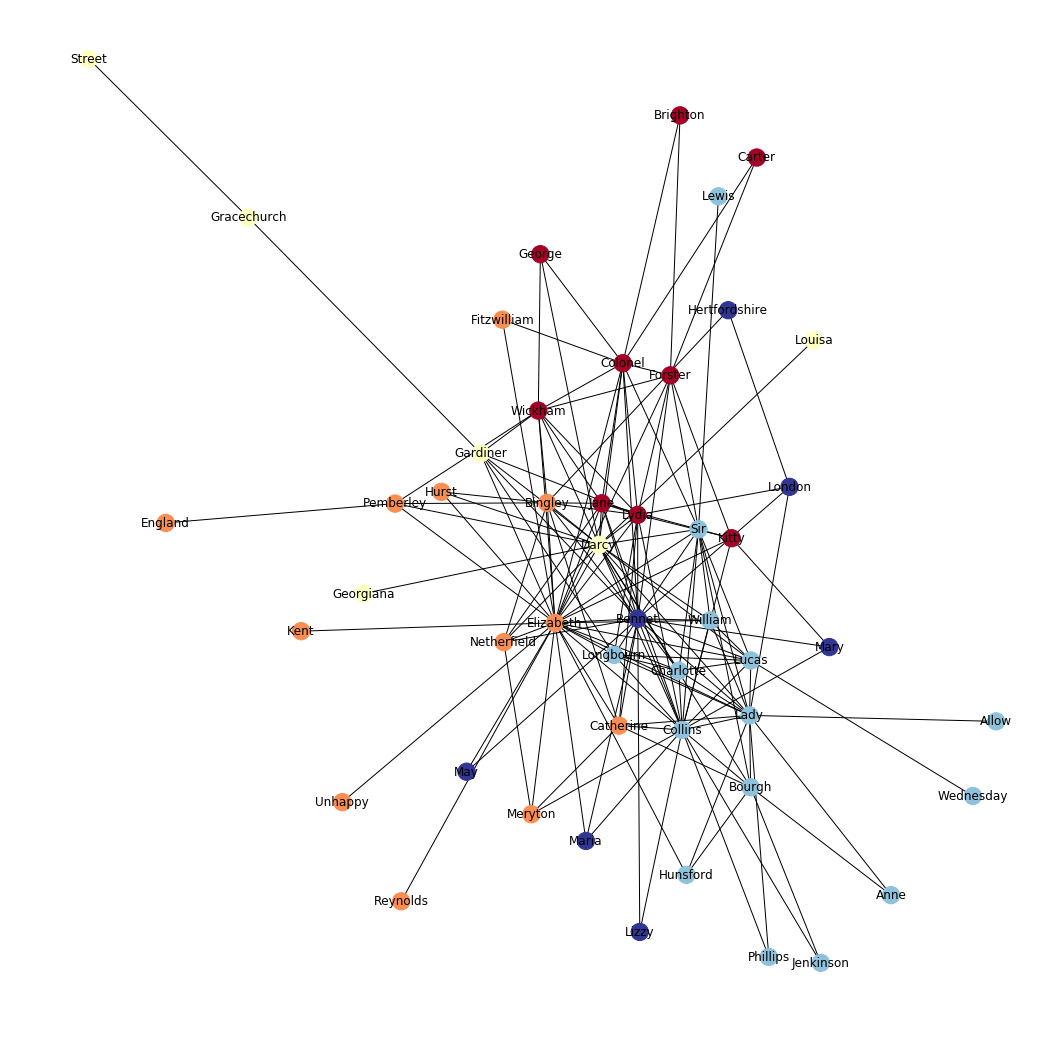

In [18]:
# Pride and Prejudice
pap_G = nx.from_pandas_edgelist(pap_int_df,
                             source='source',
                             target='target')

pap_partitions = best_partition(pap_G)
pap_values = [pap_partitions.get(node) for node in pap_G.nodes()]

plt.figure(figsize=(14,14))
graph = nx.draw_spring(pap_G, 
                       cmap=plt.get_cmap("RdYlBu"),
                       node_color=pap_values,
                       with_labels=True)
plt.savefig(os.path.join("images", "network_images", pap + "Network.png"), format="PNG")
plt.show()

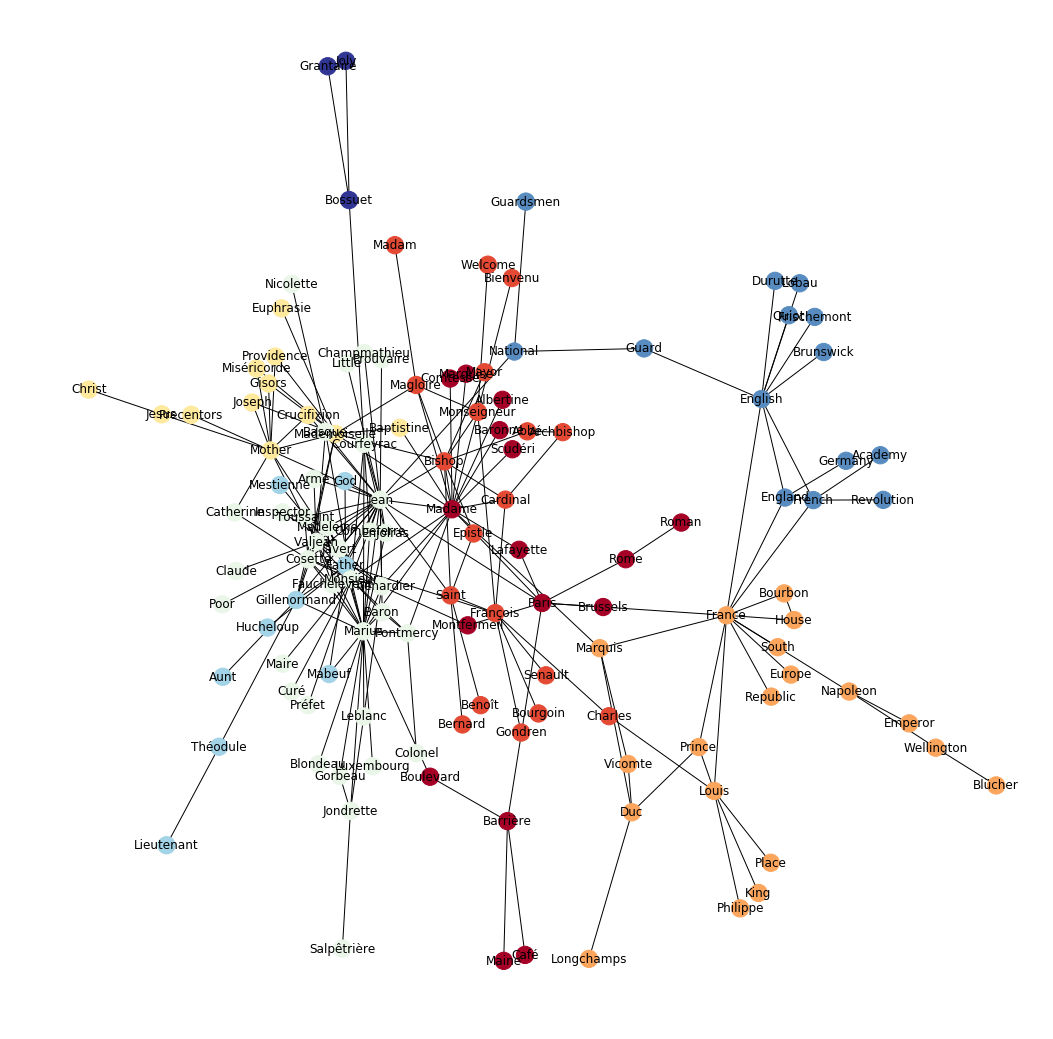

In [30]:
# Les Miserables
from community.community_louvain import best_partition

lesmis_G = nx.from_pandas_edgelist(lesmis_int_df,
                             source='source',
                             target='target')

# Partition the nodse into groups
lesmis_partitions = best_partition(lesmis_G)
lesmis_values = [lesmis_partitions.get(node) for node in lesmis_G.nodes()]

plt.figure(figsize=(14,14))
graph = nx.draw_spring(lesmis_G, 
                       cmap=plt.get_cmap("RdYlBu"),
                       node_color=lesmis_values,
                       with_labels=True)
plt.savefig(os.path.join("images", "network_images", lesmis + "Network.png"), format="PNG")
plt.show()

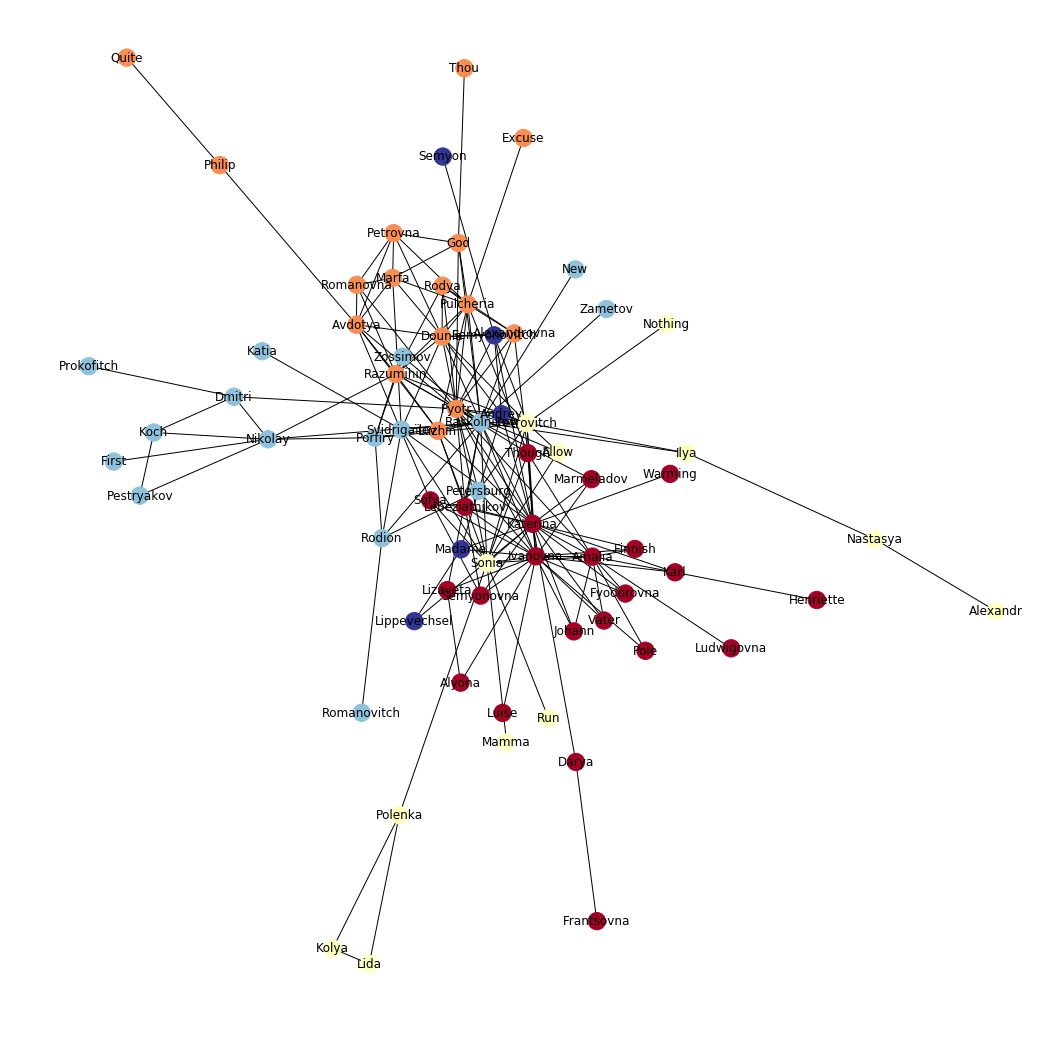

In [27]:
from community.community_louvain import best_partition

# Crime and Punishment
cap_G = nx.from_pandas_edgelist(cap_int_df,
                             source='source',
                             target='target')

# Partition the nodes into groups
cap_partitions = best_partition(cap_G)
cap_values = [cap_partitions.get(node) for node in cap_G.nodes()]

plt.figure(figsize=(14,14))
graph = nx.draw_spring(cap_G, 
                       cmap=plt.get_cmap("RdYlBu"),
                       node_color=cap_values,
                       with_labels=True)
plt.savefig(os.path.join("images", "network_images", cap + "Network.png"), format="PNG")
plt.show()

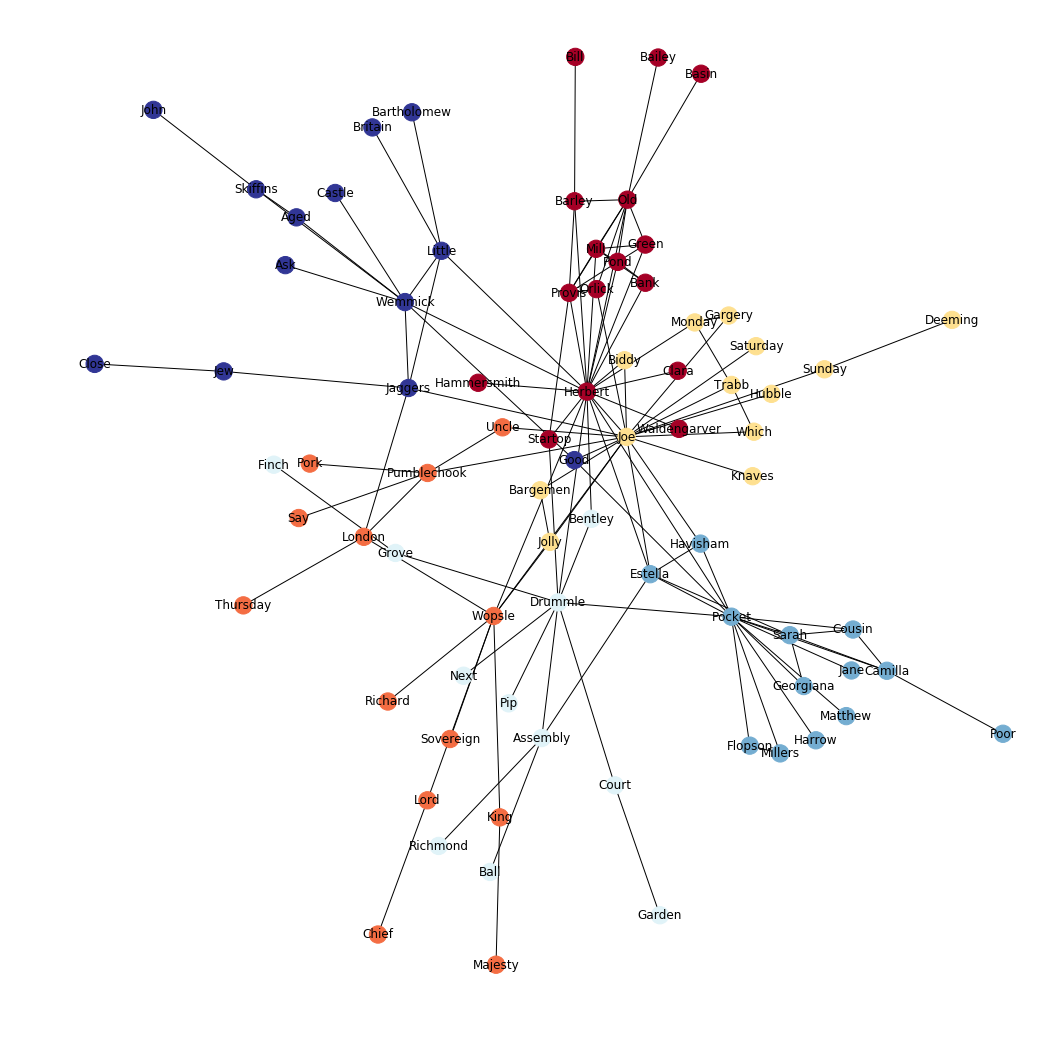

In [28]:
# Great Expectations
from community.community_louvain import best_partition

ge_G = nx.from_pandas_edgelist(ge_int_df,
                             source='source',
                             target='target')

# Partition the nodse into groups
ge_partitions = best_partition(ge_G)
ge_values = [ge_partitions.get(node) for node in ge_G.nodes()]

plt.figure(figsize=(14,14))
graph = nx.draw_spring(ge_G, 
                       cmap=plt.get_cmap("RdYlBu"),
                       node_color=ge_values,
                       with_labels=True)
plt.savefig(os.path.join("images", "network_images", ge + "Network.png"), format="PNG")
plt.show()

## Creating json files for D3 visualisations

In [31]:
'''
The following code converts the interaction dataframes into network json files 
which can be used for creating interactive D3 visualisations. 

The original function was broken, so it has been fixed and the ability to assign 
the group value to each node has been added.
'''

# Alice in Wonderland
aiw_d3dict = d3_dict_corrected(aiw_int_df, aiw_partitions)
with open(os.path.join("data", "D3_Dictionaries", aiw + ".json"), 'w') as fp:
    json.dump(aiw_d3dict, fp)

# Pride and Prejudice
pap_d3dict = d3_dict_corrected(pap_int_df, pap_partitions)
with open(os.path.join("data", "D3_Dictionaries", pap + ".json"), 'w') as fp:
    json.dump(pap_d3dict, fp)

# Les Miserables
lesmis_d3dict = d3_dict_corrected(lesmis_int_df, lesmis_partitions)
with open(os.path.join("data", "D3_Dictionaries", lesmis + ".json"), 'w') as fp:
    json.dump(lesmis_d3dict, fp)

# Crime and Punishment
cap_d3dict = d3_dict_corrected(cap_int_df, cap_partitions)
with open(os.path.join("data", "D3_Dictionaries", cap + ".json"), 'w') as fp:
    json.dump(cap_d3dict, fp)

# Great Expectations
ge_d3dict = d3_dict_corrected(ge_int_df, ge_partitions)
with open(os.path.join("data", "D3_Dictionaries", ge + ".json"), 'w') as fp:
    json.dump(ge_d3dict, fp)

## Network Info

The following section creates a table containg basic information about each network

In [32]:
networks = [aiw_G, pap_G, lesmis_G, cap_G, ge_G]
average_clustering = []
diameter = []
density = []
average_shortest_path_length = []
num_of_nodes = []
num_of_edges = []

for network in networks:
    average_clustering.append(nx.average_clustering(network))
    diameter.append(nx.diameter(network))
    density.append(nx.density(network))
    average_shortest_path_length.append(nx.average_shortest_path_length(network))
    num_of_nodes.append(len(network.nodes))
    num_of_edges.append(len(network.edges))
    

In [33]:
network_info = pd.DataFrame({'Nodes' : num_of_nodes,
                             'Edges' : num_of_edges,
                             'Average Clustering': average_clustering,
                             'Diameter' : diameter, 
                             'Density' : density,
                             'Average Shortest Path Length' : average_shortest_path_length})

In [34]:
network_info.index = ['Alice in Wonderland','Pride and Prejudice','Les Miserables', 'Crime and Punishment','Great Expectations']

In [35]:
network_info.to_csv("data/csv_files/network_info.csv")
network_info

,Nodes,Edges,Average Clustering,Diameter,Density,Average Shortest Path Length
Alice in Wonderland,23,36,0.546453,3,0.142292,1.992095
Pride and Prejudice,49,156,0.516407,5,0.132653,2.308673
Les Miserables,127,221,0.252796,8,0.027622,3.758155
Crime and Punishment,71,182,0.410508,7,0.073239,2.851509
Great Expectations,79,124,0.253441,7,0.040247,3.310938


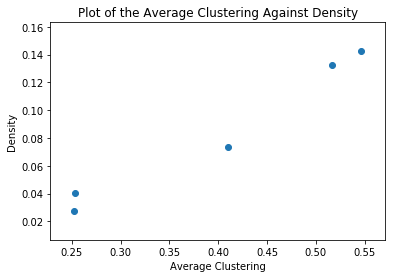

In [36]:
plt.scatter(average_clustering, density)
plt.ylabel("Density")
plt.xlabel("Average Clustering")
plt.title("Plot of the Average Clustering Against Density")
plt.savefig("images/other/den_clust_scatter.png")

## Time and Chronological Networks

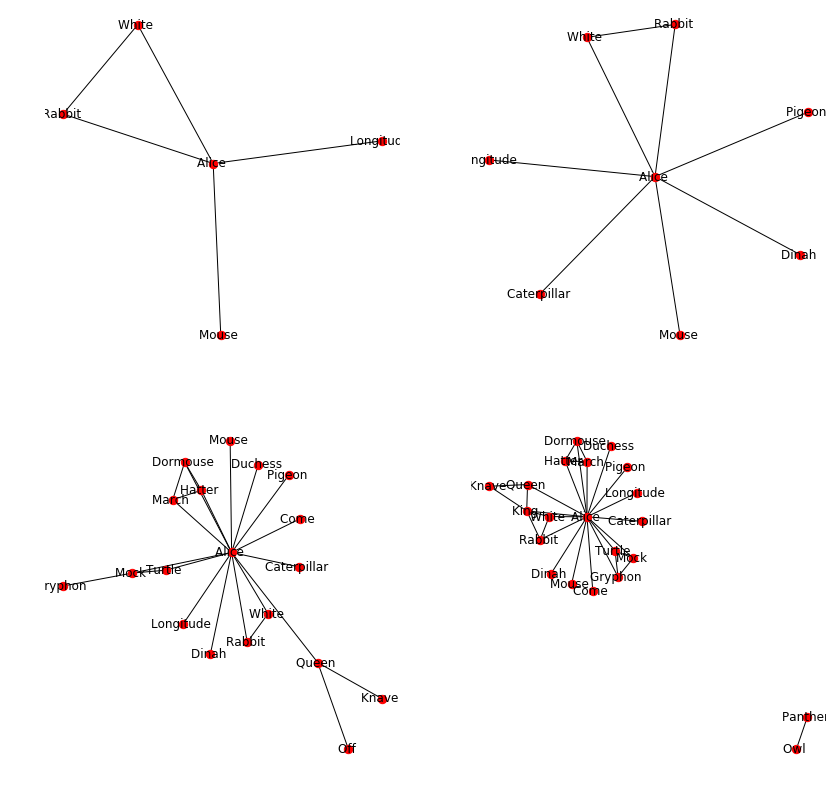

In [264]:
# Alice in Wonderland
graph_dict = chronological_network_corrected('data/raw/aliceinwonderland.txt', 
                                   n_sections=4,
                                   cumulative=True)

fig = plt.figure(figsize=((14,14)))
for i in range(1, 5):
    fig.add_subplot(2, 2, i)
    nx.draw(graph_dict[i-1], node_size=70, with_labels=True)
plt.savefig("images/time_chronological_networks/aiw_time.png")

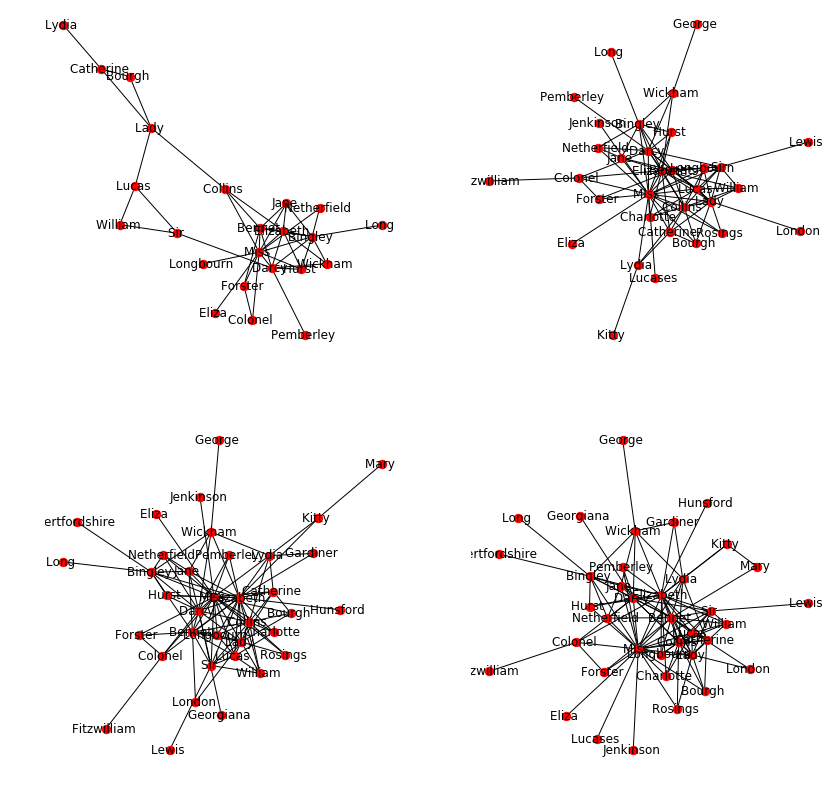

In [265]:
# Pride and Prejudice
graph_dict = chronological_network_corrected('data/raw/prideandprejudice.txt', 
                                   n_sections=4,
                                   cumulative=True)

fig = plt.figure(figsize=((14,14)))
for i in range(1, 5):
    fig.add_subplot(2, 2, i)
    nx.draw(graph_dict[i-1], node_size=70, with_labels=True)
plt.savefig("images/time_chronological_networks/pap_time.png")

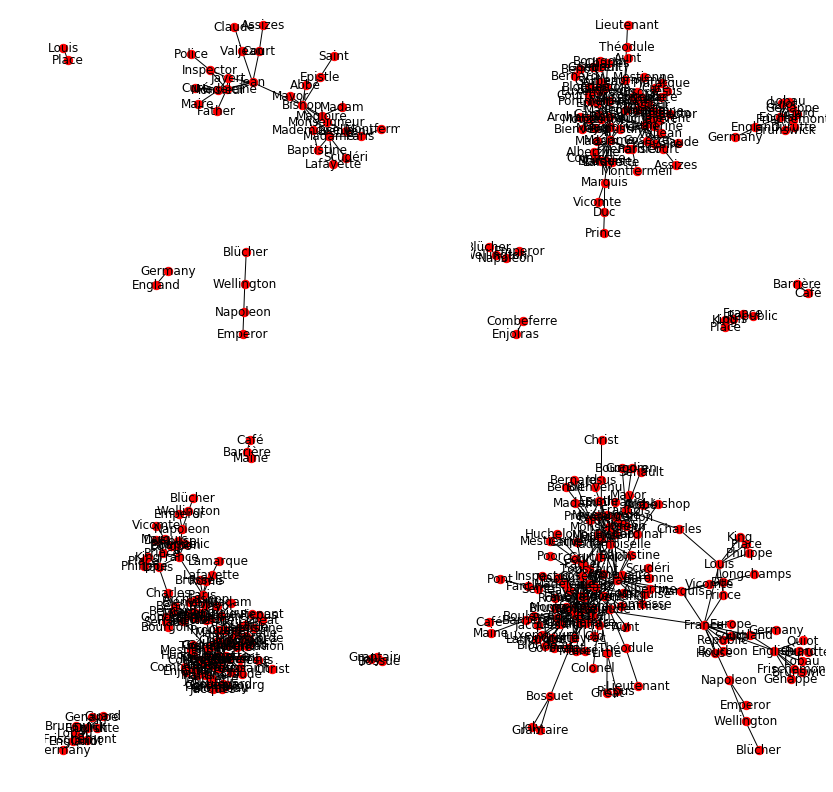

In [3]:
# Les Miserables
graph_dict = chronological_network_sanitized('data/raw/lesmiserables.txt', 
                                   n_sections=4,
                                   cumulative=True, exclude_words = ['Rue', 'Master', 'Aix',
                                                              'Sister', 'Oratory', 'Man',
                                                              'War', 'Mistress', 'Sainte', 
                                                              'Holy', 'Jardin', 'Faubourg', 
                                                              'Perpetual', 'Grand', 'Quai', 
                                                              'Azelma', 'Gavroche', 'Brujon',
                                                              'Rights', 'Ages', 'Empire', 
                                                              'July', 'New'])

fig = plt.figure(figsize=((14,14)))
for i in range(1, 5):
    fig.add_subplot(2, 2, i)
    nx.draw(graph_dict[i-1], node_size=70, with_labels=True)
plt.savefig("images/time_chronological_networks/lesmis_time.png")

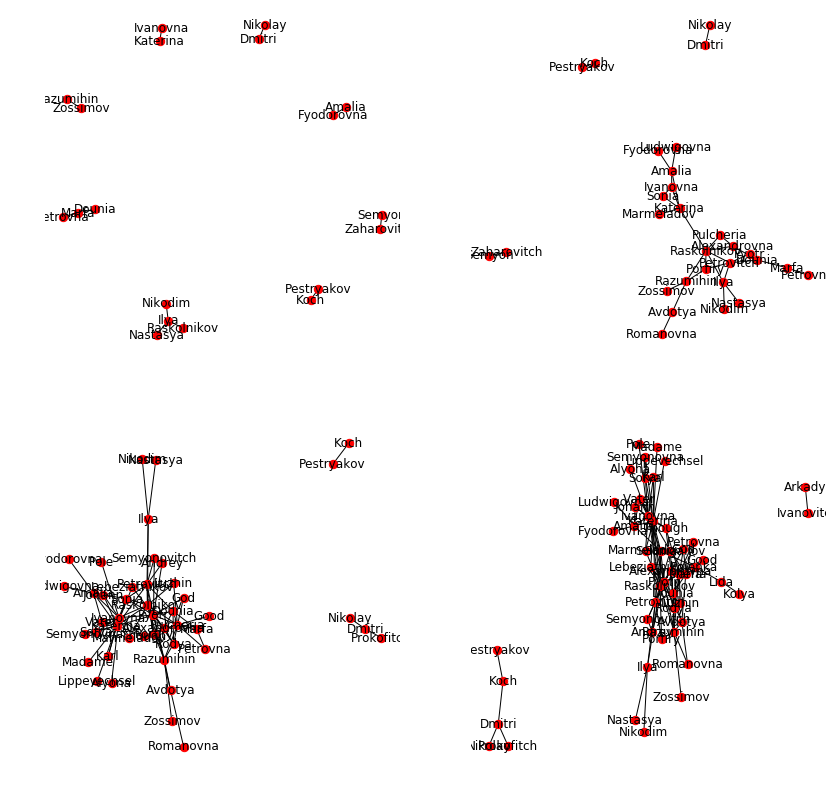

In [4]:
# Crime and Punishment
graph_dict = chronological_network_sanitized('data/raw/crimeandpunishment.txt', 
                                   n_sections=4,
                                   cumulative=True, exclude_words = ['Neva', 'Mary', 'Newton', 
                                                 'Pavlovna', 'Hay', 'Explosive',
                                                 'Afanasy'])

fig = plt.figure(figsize=((14,14)))
for i in range(1, 5):
    fig.add_subplot(2, 2, i)
    nx.draw(graph_dict[i-1], node_size=70, with_labels=True)
plt.savefig("images/time_chronological_networks/cap_time.png")

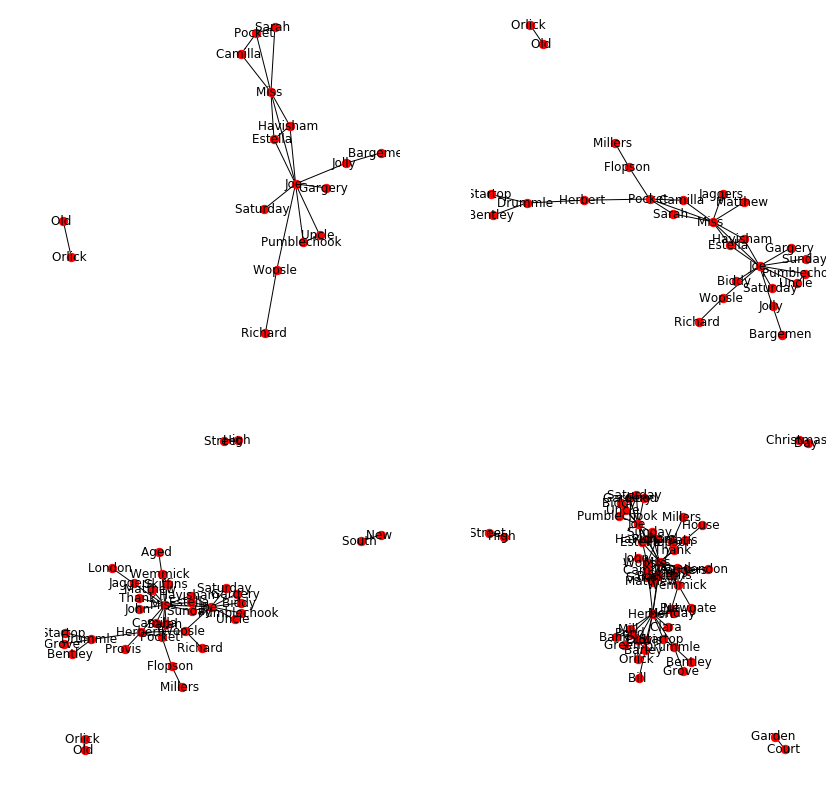

In [267]:
# Great Expectations
graph_dict = chronological_network_corrected('data/raw/greatexpectations.txt', 
                                   n_sections=4,
                                   cumulative=True)

fig = plt.figure(figsize=((14,14)))
for i in range(1, 5):
    fig.add_subplot(2, 2, i)
    nx.draw(graph_dict[i-1], node_size=70, with_labels=True)
plt.savefig("images/time_chronological_networks/ge_time.png")

## Pagerank

In [38]:
# Pagerank for all books
aiw_pagerank = pd.Series.to_frame(pd.Series(nx.pagerank(aiw_G)).sort_values(ascending=False)[:10]).reset_index()
pap_pagerank = pd.Series.to_frame(pd.Series(nx.pagerank(pap_G)).sort_values(ascending=False)[:10]).reset_index()
lesmis_pagerank = pd.Series.to_frame(pd.Series(nx.pagerank(lesmis_G)).sort_values(ascending=False)[:10]).reset_index()
cap_pagerank = pd.Series.to_frame(pd.Series(nx.pagerank(cap_G)).sort_values(ascending=False)[:10]).reset_index()
ge_pagerank = pd.Series.to_frame(pd.Series(nx.pagerank(ge_G)).sort_values(ascending=False)[:10]).reset_index()




def clean_pagerank_tables(table):
    table.columns = ["Character", "Pagerank"]
    table.index += 1
    return table

# Alice in Wonderland
aiw_pagerank = clean_pagerank_tables(aiw_pagerank)
aiw_pagerank.to_csv("data/csv_files/aiw_pagerank.csv")

In [39]:
# Pride and Prejudice Pagerank
pap_pagerank = clean_pagerank_tables(pap_pagerank)
pap_pagerank.to_csv("data/csv_files/pap_pagerank.csv")

In [40]:
# Les Miserables Pagerank
lesmis_pagerank = clean_pagerank_tables(lesmis_pagerank)
lesmis_pagerank.to_csv("data/csv_files/lesmis_pagerank.csv")

In [41]:
# Crime and Punishment Pagerank
cap_pagerank = clean_pagerank_tables(cap_pagerank)
cap_pagerank.to_csv("data/csv_files/cap_pagerank.csv")

In [42]:
# Great Expeectations Pagerank
ge_pagerank = clean_pagerank_tables(ge_pagerank)
ge_pagerank.to_csv("data/csv_files/ge_pagerank.csv")

## Novel Similarity

In [43]:
network_dictionary = {"Alice in Wonderland" : aiw_G, "Pride and Prejudice" : pap_G, "Les Miserables" : lesmis_G, "Crime and Punishment" : cap_G, "Great Expectations" : ge_G}

In [44]:
x = comparison_df(network_dictionary)
x

,Alice in Wonderland,Pride and Prejudice,Les Miserables,Crime and Punishment,Great Expectations
Alice in Wonderland,0.000000,382.316216,544.576021,492.850436,521.598368
Crime and Punishment,492.850436,1782.624530,2865.098081,0.000000,1578.637836
Great Expectations,521.598368,2545.060419,979.038540,1578.637836,0.000000
Les Miserables,544.576021,2902.400438,0.000000,2865.098081,979.038540
Pride and Prejudice,382.316216,0.000000,2902.400438,1782.624530,2545.060419


In [45]:
y = x.reindex(["Alice in Wonderland", "Pride and Prejudice", "Les Miserables", "Crime and Punishment", "Great Expectations"])
y

,Alice in Wonderland,Pride and Prejudice,Les Miserables,Crime and Punishment,Great Expectations
Alice in Wonderland,0.000000,382.316216,544.576021,492.850436,521.598368
Pride and Prejudice,382.316216,0.000000,2902.400438,1782.624530,2545.060419
Les Miserables,544.576021,2902.400438,0.000000,2865.098081,979.038540
Crime and Punishment,492.850436,1782.624530,2865.098081,0.000000,1578.637836
Great Expectations,521.598368,2545.060419,979.038540,1578.637836,0.000000


In [46]:
import seaborn as sns

cm = sns.light_palette("blue", as_cmap=True)

s = y.style.background_gradient(cmap=cm)
s

,Alice in Wonderland,Pride and Prejudice,Les Miserables,Crime and Punishment,Great Expectations
Alice in Wonderland,0,382.316,544.576,492.85,521.598
Pride and Prejudice,382.316,0,2902.4,1782.62,2545.06
Les Miserables,544.576,2902.4,0,2865.1,979.039
Crime and Punishment,492.85,1782.62,2865.1,0,1578.64
Great Expectations,521.598,2545.06,979.039,1578.64,0


In [47]:
y.to_csv("data/csv_files/similarity_matrix.csv")

Text(0.5, 1.0, 'Colormap of Novel Similarity')

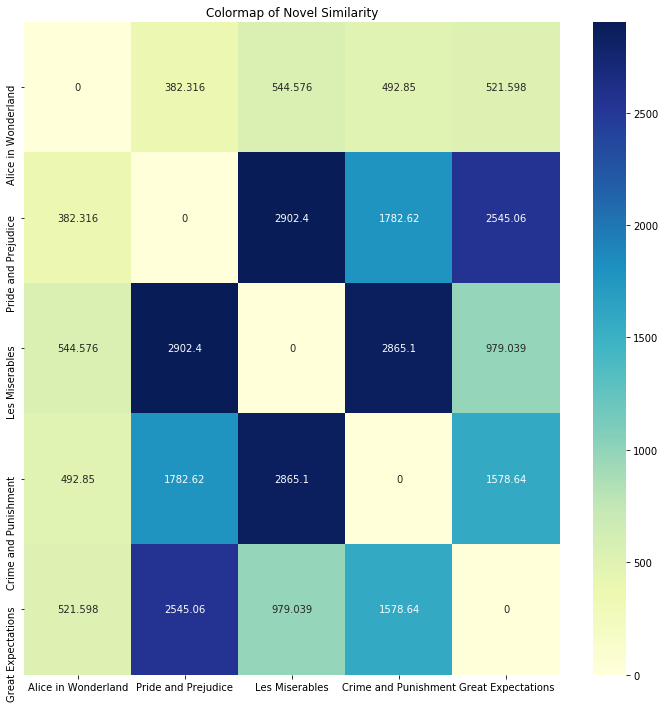

In [49]:
plt.figure(figsize=(12,12))
sns.heatmap(y, annot=True,fmt='n', cmap="YlGnBu")
plt.savefig("data/csv_files/sim_mat.png")
plt.title("Colormap of Novel Similarity")

In [205]:
y.sum().sort_values()

Alice in Wonderland     1070.670869
Crime and Punishment    4167.178502
Great Expectations      5176.345299
Pride and Prejudice     6521.075138
dtype: float64